In [23]:
import pandas as pd
papers = pd.read_csv('papers.csv')
papers.head()


,Title,Year,Conference,contains_keyword,Address Ethics,Session Title,IRB Status,Ethics Statement,IEEE Keywords,INSPEC: Controlled Indexing,INSPEC: Non-Controlled Indexing,Author Keywords,Link
0,Using Selective Memoization to Defeat Regular ...,2021,IEEE S&P,False,False,Software Security,none,[],"['Privacy', 'Computer languages', 'Web service...","['computer network security', 'Web services']","['regular expressions', 'programming languages...","['Regular expressions', 'denial of service', '...",https://ieeexplore.ieee.org/document/9519427
1,Co Inflow Coarse grained Information Flow Cont...,2021,IEEE S&P,False,False,Software Security,none,[],"['Java', 'Privacy', 'Runtime', 'Annotations', ...","['Java', 'object-oriented methods', 'object-or...","['middle-weight imperative calculus', 'Java-li...","['coarse-grained-information-flow-control', 'd...",https://ieeexplore.ieee.org/document/9519397
2,When Function Signature Recovery Meets Compile...,2021,IEEE S&P,False,False,Software Security,none,[],"['Privacy', 'Program processors', 'Security', ...","['digital signatures', 'flow graphs', 'program...","['fine-grained control-flow graph', 'control-f...",[],https://ieeexplore.ieee.org/document/9519479
3,How Did That Get In My Phone Unwanted App Dist...,2021,IEEE S&P,False,False,Mobile Security,none,[],"['Performance evaluation', 'Privacy', 'Operati...","['Android (operating system)', 'Internet', 'in...",['less understood alternative distribution vec...,"['android', 'unwanted-apps', 'malware']",https://ieeexplore.ieee.org/document/9519429
4,Android Custom Permissions Demystified From Pr...,2021,IEEE S&P,False,False,Mobile Security,none,[],"['Privacy', 'Data privacy', 'Design methodolog...","['Android (operating system)', 'authorisation'...","['dangling custom permission', 'inconsistent p...",[],https://ieeexplore.ieee.org/document/9519385


<Axes: >

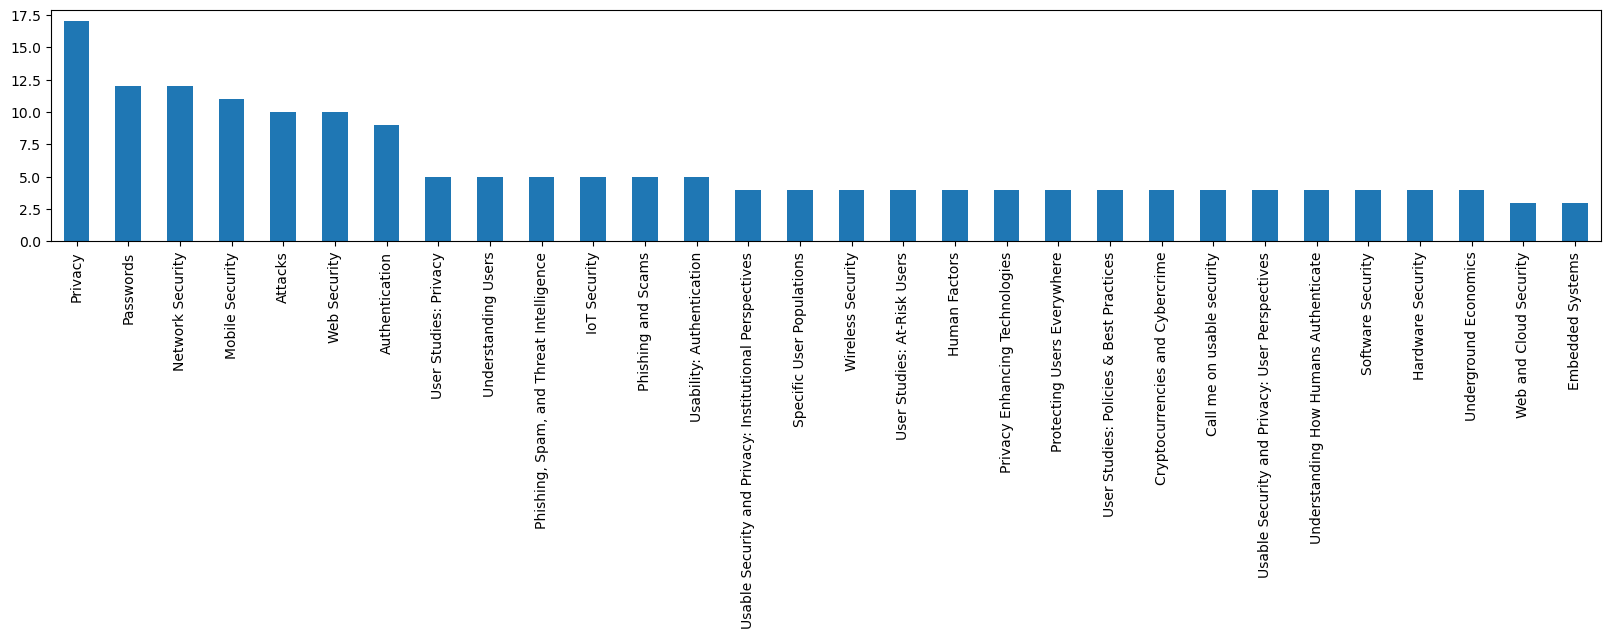

In [24]:
session_name = papers[(papers['Address Ethics']==True) | (papers['contains_keyword']==True)]['Session Title']
session_name.head()
session_name.value_counts().nlargest(30).plot(kind='bar', figsize=(20,3))


<Axes: >

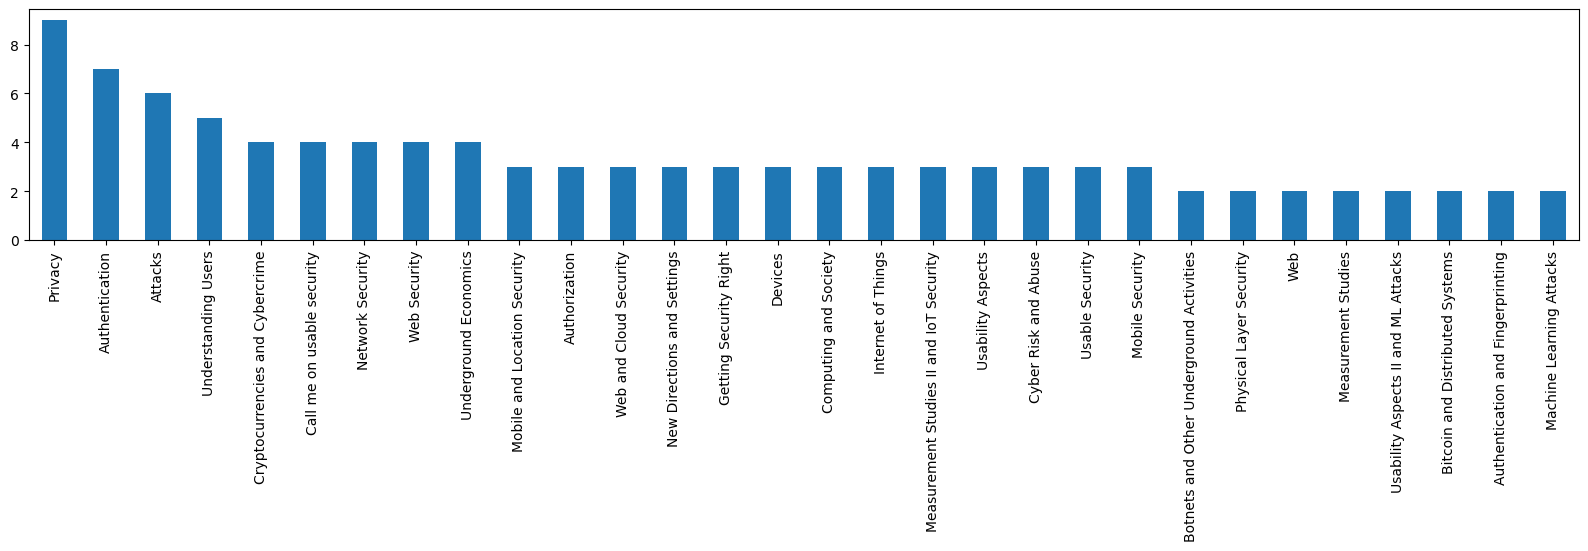

In [25]:
IEEE_session_name = papers[((papers['Address Ethics']==True) | (papers['contains_keyword']==True)) & (papers['Conference']=='IEEE S&P')]['Session Title']
IEEE_session_name.head()
IEEE_value_filtered = IEEE_session_name.value_counts()
IEEE_value_filtered.nlargest(30).plot(kind='bar', figsize=(20,3))

In [26]:
from matplotlib import pyplot as plt


IEEE_keyword_name = papers[((papers['Address Ethics']==True) | (papers['contains_keyword']==True)) & (papers['Conference']=='IEEE S&P')]['IEEE Keywords']
IEEE_Keyword_count = IEEE_keyword_name.explode('IEEE Keywords')
IEEE_Keyword_total = IEEE_Keyword_count['IEEE Keywords'].tolist()
keywords = IEEE_Keyword_total.count()
plt.plot(keywords)

KeyError: 'IEEE Keywords'

<Axes: >

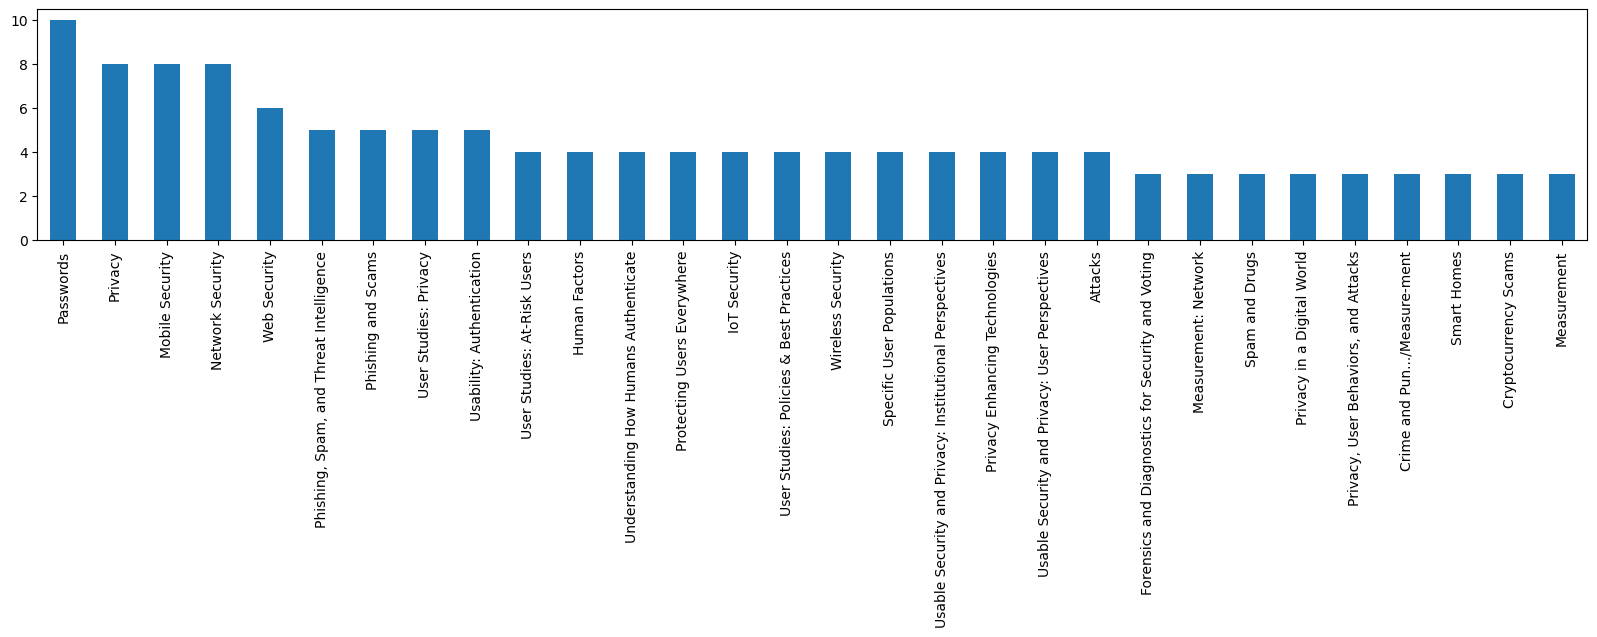

In [ ]:
Usenix_session_name = papers[((papers['Address Ethics']==True) | (papers['contains_keyword']==True)) & (papers['Conference']=='USENIX Security')]['Session Title']
Usenix_session_name.head()
Usenix_value_filtered = Usenix_session_name.value_counts()
Usenix_value_filtered.nlargest(30).plot(kind='bar', figsize=(20,3))

<Axes: >

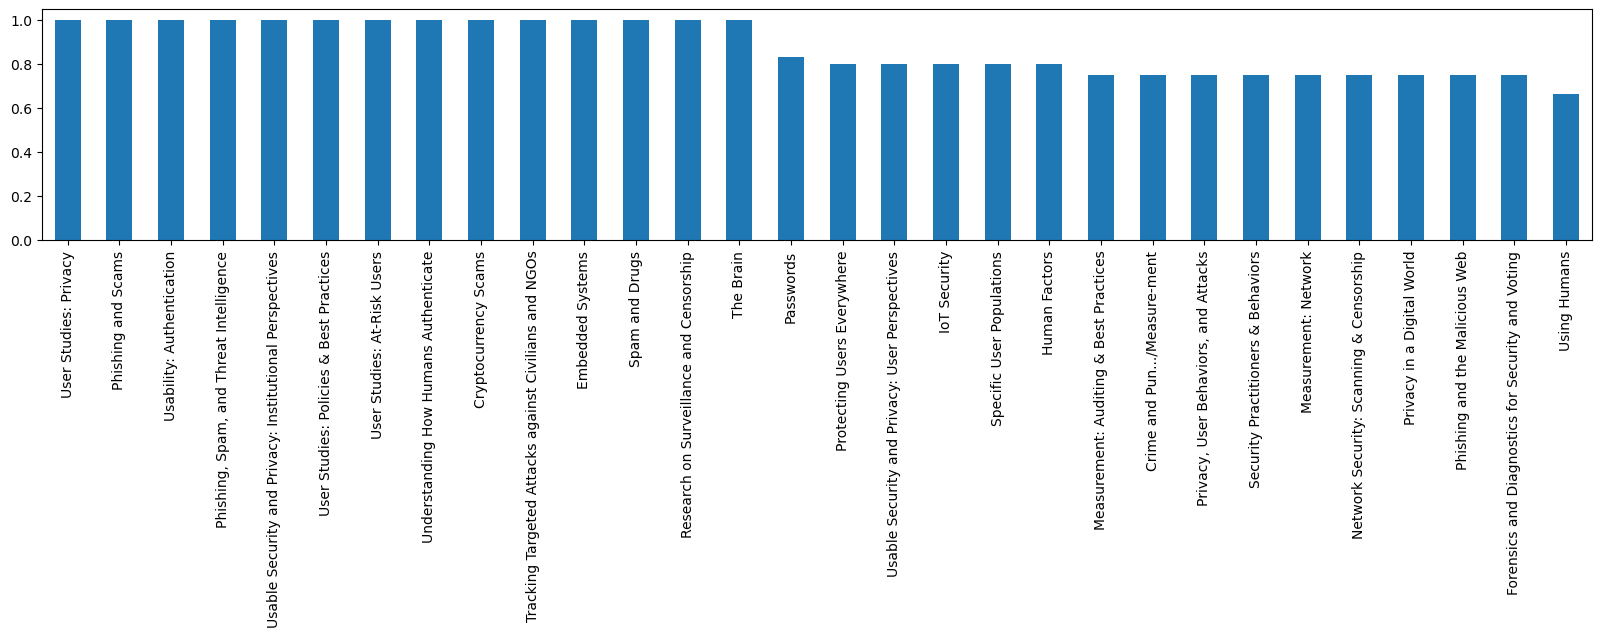

In [ ]:
Usenix_session_name_all = papers[papers['Conference']=='USENIX Security']['Session Title']
Usenix_session_name_all.head()
values= Usenix_session_name_all.value_counts()
percentage = pd.merge(values, Usenix_value_filtered, left_index=True, right_index=True, how='inner')

percentage['percentage'] = percentage['Session Title_y'] / percentage['Session Title_x']
percentage['percentage'].nlargest(30).plot(kind='bar', figsize=(20,3))

<Axes: >

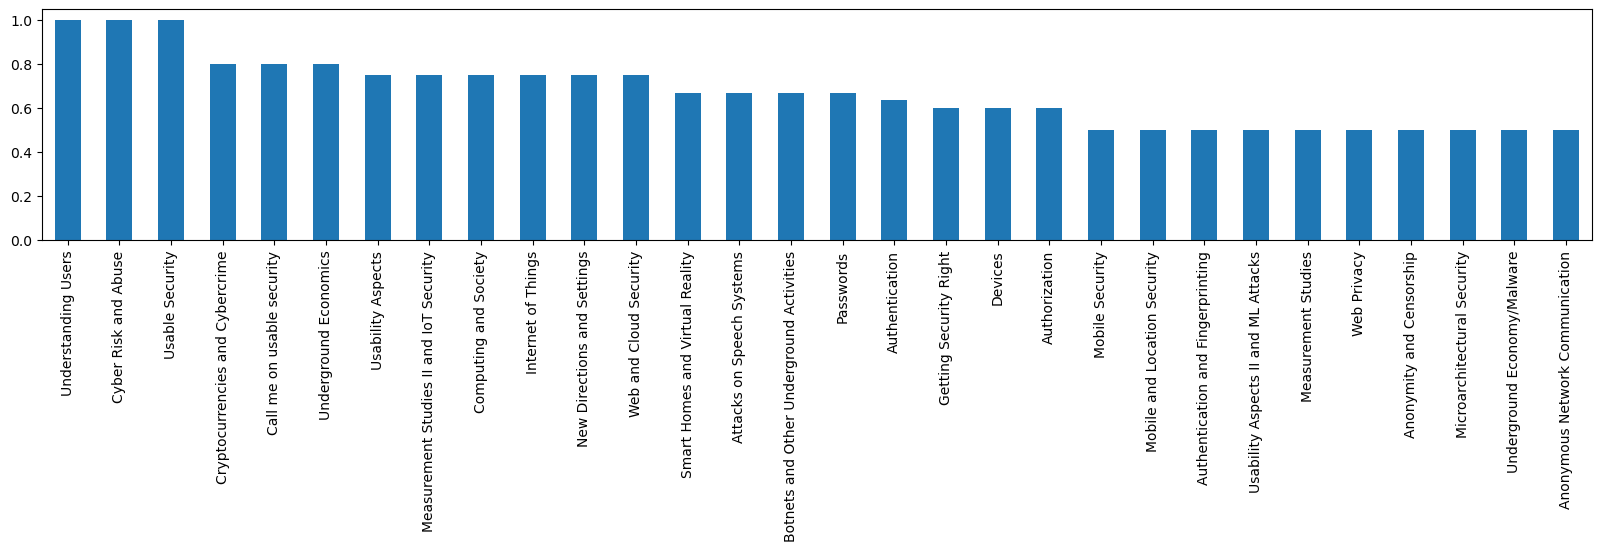

In [ ]:
IEEE_session_name_all = papers[papers['Conference']=='IEEE S&P']['Session Title']
IEEE_session_name_all.head()
IEEE_values= IEEE_session_name_all.value_counts()
IEEE_percentage = pd.merge(IEEE_values, IEEE_value_filtered, left_index=True, right_index=True, how='inner')

IEEE_percentage['percentage'] = IEEE_percentage['Session Title_y'] / IEEE_percentage['Session Title_x']
IEEE_percentage['percentage'].nlargest(30).plot(kind='bar', figsize=(20,3))